Тренування моделі...
Точність на навчанні: 100.00%
Точність на тесті: 89.17%


<Figure size 600x600 with 0 Axes>

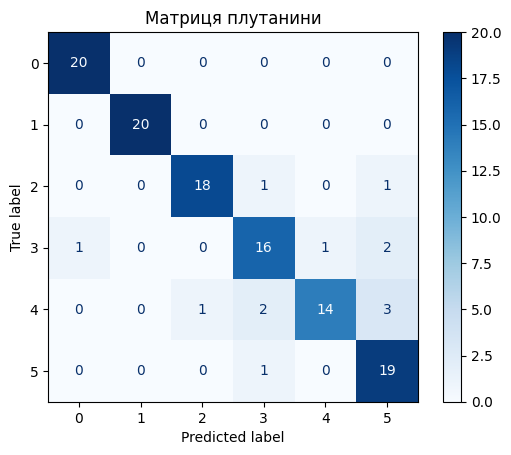

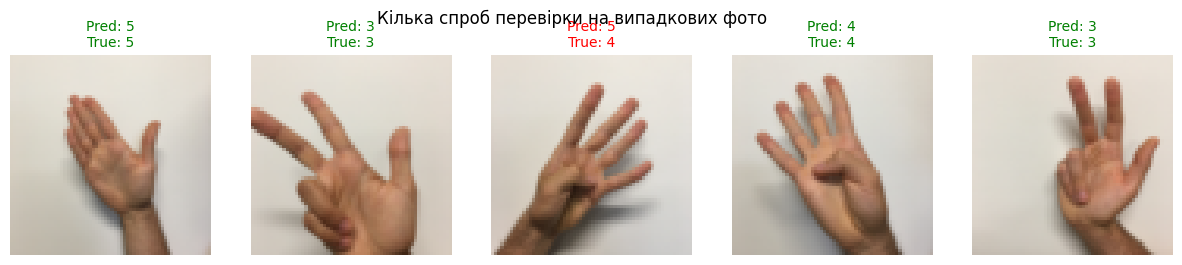

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Завантаження даних
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Спроба завантажити дані
try:
    X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
except Exception as e:
    print(f"Помилка: {e}. Використовую випадкові дані для тесту коду.")
    X_train_orig = np.random.rand(100, 64, 64, 3)
    Y_train_orig = np.random.randint(0, 6, (1, 100))
    X_test_orig = np.random.rand(20, 64, 64, 3)
    Y_test_orig = np.random.randint(0, 6, (1, 20))

# 2. Підготовка (Flatten & Normalize)
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]

X_train_flatten = X_train_orig.reshape(m_train, -1)
X_test_flatten = X_test_orig.reshape(m_test, -1)

X_train_scaled = X_train_flatten / 255.
X_test_scaled = X_test_flatten / 255.

Y_train = np.squeeze(Y_train_orig)
Y_test = np.squeeze(Y_test_orig)

# 3. Навчання (LBFGS - найкращий для малих датасетів, але без графіка loss_curve)
clf = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(100, 50), 
    random_state=1, 
    max_iter=1000
)

print("Тренування моделі...")
clf.fit(X_train_scaled, Y_train)

# 4. Вивід точності
print(f"Точність на навчанні: {clf.score(X_train_scaled, Y_train):.2%}")
print(f"Точність на тесті: {clf.score(X_test_scaled, Y_test):.2%}")

# 5. Матриця плутанини (Графік точності розпізнавання класів)
predictions = clf.predict(X_test_scaled)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Матриця плутанини")
plt.show()

# 6. Кілька спроб перевірки (Visual Check)
# Вибираємо 5 випадкових картинок для наочності
num_attempts = 5
indices = np.random.choice(m_test, num_attempts, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_attempts, i + 1)
    plt.imshow(X_test_orig[idx])
    
    # Передбачення
    pred = clf.predict(X_test_scaled[idx].reshape(1, -1))[0]
    true_label = Y_test[idx]
    
    # Зелений колір - правильно, Червоний - помилка
    col = 'green' if pred == true_label else 'red'
    
    plt.title(f"Pred: {pred}\nTrue: {true_label}", color=col, fontsize=10)
    plt.axis('off')

plt.suptitle("Кілька спроб перевірки на випадкових фото")
plt.show()